In [1]:
# Modules

import turicreate as tc

In [2]:
# Load data
image_data = tc.SFrame('image_train_data/')
image_test = tc.SFrame('image_test_data/')

In [3]:
image_data.head()

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


**Task 1: Compute summary statistics of the data**

Sketch summaries are techniques for computing summary statistics of data very quickly. In Turi Create has a method sketch which computes summary statistics. Using the training data, compute the sketch summary of the label column and interpret the results by running this command.
```Python
sketch = turicreate.Sketch(image_data['label'])
```
Then look at the sketch object to see the summary statistics.
What is the least common category in the training data? Save this result to answer the quiz for this module.

In [4]:
sketch = tc.Sketch(image_data['label'])

In [5]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


**Task 2: Create category-specific image retrieval models**

In most retrieval tasks, the data are unlabeled, thus you call these unsupervised learning problems. This image dataset has labels, so you will use them to create one model for each of the four image categories, dog, cat, automobile, and bird.

Follow these steps:

1. Split the training data into 4 different SFrame data structures. Each will contain data for one of the four categories image categories. (Hint: If you use a logical filter to select the rows where the label column equals ‘dog’, you can create an SFrame that contains only the data for images labeled ‘dog’.)
2. Similarly to the image retrieval notebook you downloaded, you will create a nearest neighbor model using deep features. You will create one such model for each category, using the corresponding subset of the training data. Call the model with the dog images dog_model, the one with the cat images cat_model, as so on.

You now have a nearest neighbors model, dog_model, that can find the nearest dog to any image you give the model. Another model, cat_model, that can find the nearest cat to any image you give it, and so on.

In [6]:
cat = image_data[image_data['label'] == 'cat']
dog = image_data[image_data['label'] == 'dog']
automobile = image_data[image_data['label'] == 'automobile']
bird = image_data[image_data['label'] == 'bird']

In [7]:
cat_model = tc.nearest_neighbors.create(cat,
                                        features=['deep_features'],
                                        label='id')
dog_model = tc.nearest_neighbors.create(dog,
                                        features=['deep_features'],
                                        label='id')
automobile_model = tc.nearest_neighbors.create(automobile,
                                               features=['deep_features'],
                                               label='id')
bird_model = tc.nearest_neighbors.create(bird,
                                        features=['deep_features'],
                                        label='id')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

Using these models, answer the following questions.

+ What is the nearest cat-labeled image in the training data to the cat image that is the first image in the test data ?
+ What is the nearest dog-labeled image in the training data to the cat image that is the first image in the test data?

Save these results to answer the quiz for this module.

,SArray
0,

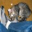

In [8]:
cat_1 = image_test[0:1]
cat_1['image'].explore()

In [9]:
sim_cat_cat_1 = cat_model.query(cat_1)
sim_cat_cat_1

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 4.164ms      |

| Done         |         | 100         | 29.027ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16289,34.62371920804245,1
0,45646,36.00687992842462,2
0,32139,36.52008134363789,3
0,25713,36.754850252057054,4
0,331,36.87312281675268,5


,SArray
0,

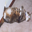

In [10]:
image_data[image_data['id'] == 16289]['image'].explore()

In [11]:
sim_dog_cat_1 = dog_model.query(cat_1)
sim_dog_cat_1

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.112ms      |

| Done         |         | 100         | 29.193ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


,SArray
0,

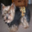

In [12]:
image_data[image_data['id'] == 16976]['image'].explore()

**Task 3: Try a simple example of nearest-neighbors classification**

When you queried the nearest neighbors model, the distance column in the Task 2 showed the computed distance between the input and each of the retrieved neighbors. In this task, you will use these distances for classification, using a nearest-neighbors classifier.

+ For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘cat’ in the training data (similar to what you did in the previous question).
+ For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘dog’ in the training data (similar to what you did in the previous question).

On average, is the first image in the test data closer to its five nearest neighbors in the ‘cat’ data or in the ‘dog’ data?

Save these results to answer the quiz for this module.

In [13]:
cat_1_mean_distance_cat = cat_model.query(cat_1)['distance'].mean()
cat_1_mean_distance_dog = dog_model.query(cat_1)['distance'].mean()

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.083ms      |

| Done         |         | 100         | 32.372ms     |

+--------------+---------+-------------+--------------+

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 3.976ms      |

| Done         |         | 100         | 28.102ms     |

+--------------+---------+-------------+--------------+

In [14]:
print(f'Cat 1 - Cat distance = {cat_1_mean_distance_cat}')
print(f'Cat 1 - Dog distance = {cat_1_mean_distance_dog}')

Cat 1 - Cat distance = 36.15573070978294
Cat 1 - Dog distance = 37.77071136184157


**Task 4: Compute nearest neighbors accuracy**

A nearest neighbor classifier predicts the label of a point as the most common label of its nearest neighbors. In this task, you will measure the accuracy of a 1-nearest-neighbor classifier, i.e., predict the output as the label of the nearest neighbor in the training data. Although there are simpler ways of computing this result, this way introduces you to additional concepts in nearest neighbors and SFrames, which will be useful in your future machine learning education.

Use the four nearest neighbors models you trained previously on the training data, the dog, cat, automobile, and bird models.

Just as you split the training data on label, you will now use the same procedure to split the test data on the cat, dog, automobile, and bird labels. Name the resulting SFrame data structures:

image_test_cat, image_test_dog, image_test_bird, image_test_automobile

Next you'll find nearest neighbors in the training set for each part of the test set

Thus far you queried the nearest neighbors models with a single image as the input, but you can actually query with a whole set of data. The query will find the nearest neighbors for each data point. Note that the input index is stored in the query_labelcolumn of the resulting SFrame.

Using this knowledge find the closest neighbor to the dog test data using each of the trained models. For example, this code:
```Python
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)
```

finds one neighbor (i.e., k=1) to the dog test images (image_test_dog) in the cat portion of the training data.

Next, follow the same procedure for the other dog combinations: dog-automobile, dog-bird, and dog-dog.

Create an SFrame with the distances from the dog test examples to the respective nearest neighbors in each class in the training data.

The distance column in dog_cat_neighbors contains the distance between each dog-labeled image in the test set and its nearest cat-labeled image in the training set. The question to answer is: How many of the test set dog images are closer to a dog in the training set than to a cat, automobile, or bird?

Next you will create an SFrame containing just these distances per data point. The goal is to create an SFrame called dog_distances with 4 columns:

dog_distances[‘dog-dog’] ---- storing dog_dog_neighbors[‘distance’]
dog_distances[‘dog-cat’] ---- storing dog_cat_neighbors[‘distance’]
dog_distances[‘dog-automobile’] ---- storing dog_automobile_neighbors[‘distance’]
dog_distances[‘dog-bird’] ---- storing dog_bird_neighbors[‘distance’]

Hint: You can create a new SFrame from the columns of other SFrame structures by creating a dictionary with the new columns, as shown in this example:
```Python
news_frame = turicreate.SFrame({'foo': others_frame['foo'],'bar': some_others_frame['bar']})
```

Compute the number of correct predictions using 1-nearest neighbors for the dog class.

Now that you have created dog_distances, you will use the apply method on this SFrame to iterate through each row and compute the number of dog test examples where the distance to the nearest dog image was lower than that to the other image classes.

You will perform three steps:

1. Consider one row of dog_distances and call this variable row. You can access each distance by calling, for example, row['dog-cat'] which, in the previous table, will have value equal to 36.4196077068 for the first row. Create a function, def is_dog_correct(row):, that returns 1 if the value for row[‘dog-dog’] is lower than that of the other columns, and 0 otherwise. That is, returns 1 if this row is correctly classified by 1-nearest neighbors, and 0 if it is not.
2. Using the function is_dog_correct(row), you can check if one row is correctly classified. Next, you need to count how many rows are correctly classified. You could use a for loop to iterate through each row and apply the function is_dog_correct(row), but this method is extremely slow. An SFrame is not optimized for this type of operation. Instead, use the apply method to iterate the function is_dog_correct for each row.
3. Compute the number of correct predictions for dog. You can now call the function dog_distances.apply(is_dog_correct)which returns an SArray structure (a column of data) with a value 1 for every correct row and a value 0 for every incorrect one. You can call the sum method on the result to get the total number of correctly classified dog images in the test set.

Using the work you did in this task, what is the accuracy of the 1-nearest neighbor classifier at classifying dog images from the test set?

NOTE: If you are uncertain that your code is working correctly, you can perform steps 1 and 2 to count the number of correctly classified cat images in the test data. Your result should be 548. This verification will take you some time, so you might do it only if you get the wrong answer on the quiz and can't figure out why. 

Save these results to answer the quiz for this module.

In [15]:
image_test_cat = image_test[image_test['label'] == 'cat']
image_test_dog = image_test[image_test['label'] == 'dog']
image_test_automobile = image_test[image_test['label'] == 'automobile']
image_test_bird = image_test[image_test['label'] == 'bird']

In [16]:
dog_cat_neighbors = cat_model.query(image_test_dog, k=1)
dog_automobile_neighbors = automobile_model.query(image_test_dog, k=1)
dog_bird_neighbors = bird_model.query(image_test_dog, k=1)
dog_dog_neighbors = dog_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 193.626ms    |

| Done         | 509000  | 100         | 296.712ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 191.779ms    |

| Done         | 509000  | 100         | 310.183ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 60000   | 12.5523     | 204.494ms    |

| Done         | 478000  | 100         | 262.513ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 236.472ms    |

| Done         | 509000  | 100         | 263.661ms    |

+--------------+---------+-------------+--------------+

In [17]:
dog_cat_distance = dog_cat_neighbors['distance']
dog_automobile_distance = dog_automobile_neighbors['distance']
dog_bird_distance = dog_bird_neighbors['distance']
dog_dog_distance = dog_dog_neighbors['distance']

In [18]:
print(f'{sum(dog_dog_distance < dog_cat_distance)} test set dog images are '
      'closer to a dog in the training set than to a cat')
print(f'{sum(dog_dog_distance < dog_automobile_distance)} test set dog images are '
      'closer to a dog in the training set than to an automobile')
print(f'{sum(dog_dog_distance < dog_bird_distance)} test set dog images are '
      'closer to a dog in the training set than to a bird')

722 test set dog images are closer to a dog in the training set than to a cat
980 test set dog images are closer to a dog in the training set than to an automobile
886 test set dog images are closer to a dog in the training set than to a bird


In [19]:
dog_distances = tc.SFrame({'dog_dog': dog_dog_distance,
                           'dog_cat': dog_cat_distance,
                           'dog_automobile': dog_automobile_distance,
                           'dog_bird': dog_bird_distance})

In [20]:
dog_distances

dog_automobile,dog_bird,dog_cat,dog_dog
41.95797614571203,41.75386473035126,36.419607706754384,33.47735903726335
46.00213318067788,41.3382958924861,38.83532688735542,32.84584956840554
42.946229069238804,38.615759085289056,36.97634108541546,35.03970731890584
41.68660600484793,37.08922699538214,34.575007291446106,33.90103276968193
39.22696649347584,38.27228869398105,34.77882479101661,37.484925090925636
40.58451176980721,39.146208923590486,35.11715782924591,34.94516534398124
45.10673529610854,40.523040105962316,40.60958309132649,39.095727834463545
41.32211409739762,38.19479183926956,39.90368673062214,37.76961310322034
41.82446549950164,40.156713166131446,38.067470016821176,35.10891446032838
45.497692940110376,45.55979626027668,42.72587329506032,43.242283258453455


In [21]:
def is_dog_correct(row):
    if ((row['dog_dog'] < row['dog_automobile'])
        and (row['dog_dog'] < row['dog_cat'])
        and (row['dog_dog'] < row['dog_bird'])):
            
        return 1
    else:
        return 0

In [22]:
print(f'recal = {sum(dog_distances.apply(is_dog_correct)) / len(dog_distances)}')

recal = 0.678
